### Outliers
    outliers are data points that differ significantly from others
    machine learning can be distract from outliers 

More impact 
    Linear regression
    Logistic regression
    Ada boust
    

### How to treat outliers
    - trimming
    - capping

### trimming
    Simply remove outliers

### capping
    As outliers either it will be low or high outlier is not an average value i.e in marks outliers either will be very less marks or very high
    SO in this technique we set a limmit 

## Techniques for Outlier Dtection and Removal
    Zscore treatment
    IQR based filtering
    Percentile
    winserization

Zscore treatment
    Data should be normall distributed
    findout mean + 3 std  and mean -3 std (findout upper limit and lower limit)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('placement.csv')

In [6]:
df.shape

(1000, 3)

In [7]:
df.sample(5)

,cgpa,placement_exam_marks,placed
566,6.03,25.0,0
874,6.60,24.0,0
575,7.55,16.0,0
626,7.63,19.0,1
343,7.20,70.0,1


C:\Users\Dell\AppData\Local\Temp\ipykernel_2604\2931562495.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_2604\2931562495.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


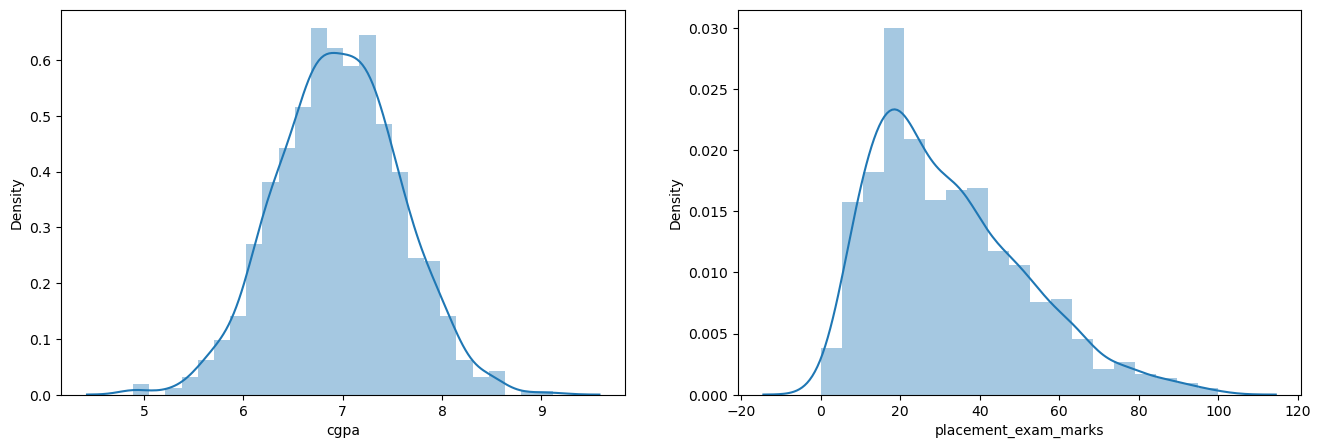

In [8]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()#the graph show that 'cgpa' column is normallly distributed so we can apply zscore tre..

In [9]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [10]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323894
Min value of cgpa 4.89
Max value of cgpa 9.12


In [11]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [12]:
#finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## Trimming

In [13]:
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]

In [14]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [15]:
# Approach 2 
# Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [16]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [17]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [19]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [20]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [21]:
# Trimming 
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [22]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# capping

In [24]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [27]:
upper_limit

np.float64(8.808933625397168)

In [28]:
df['cgpa'] = np.where(
    df['cgpa'] > upper_limit, # if cgpa is greater than upper limit
    upper_limit, #so print upper limit
    np.where(
        df['cgpa'] < lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [29]:
df.shape

(1000, 4)

In [30]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

## Outlier Detection using IQR (Interquartile Range)

####  What is IQR?

IQR = Interquartile Range

It measures the spread of the middle 50% of the data.

#### Formula:

Q1 = 25th percentile

Q3 = 75th percentile

IQR = Q3 − Q1

#### Why use IQR for outliers?

Simple and effective

Works well on skewed (non-normal) data

Not influenced by extreme values

#### How to Detect Outliers with IQR (Step-by-step)

Sort the data

Find Q1 (25%)

Find Q3 (75%)

Calculate IQR = Q3 − Q1

Compute the boundaries:

Lower bound = Q1 − 1.5 × IQR

Upper bound = Q3 + 1.5 × IQR

Any value:

< lower bound → Lower outlier

upper bound → Upper outlier

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('placement.csv')

In [33]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\Users\Dell\AppData\Local\Temp\ipykernel_2604\3792736820.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_2604\3792736820.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


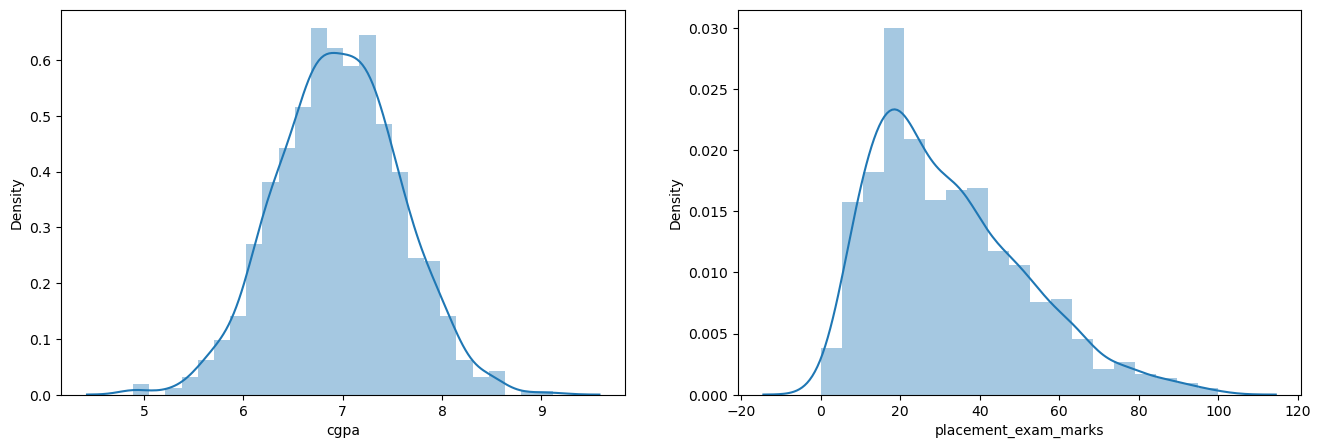

In [35]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [36]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

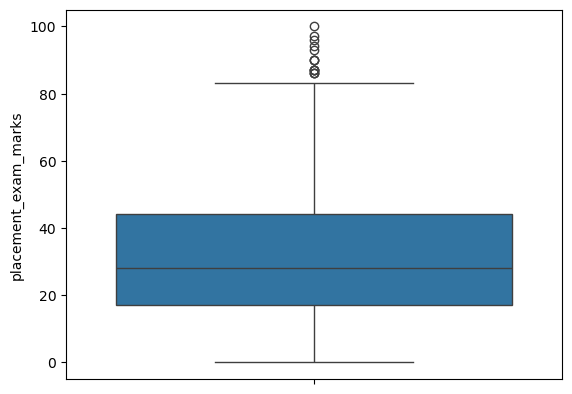

In [37]:
sns.boxplot(df['placement_exam_marks'])

In [38]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [39]:
percentile75

np.float64(44.0)

In [40]:
iqr = percentile75 - percentile25

In [41]:
iqr

np.float64(27.0)

In [42]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [43]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


## Finding outliers

In [45]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [46]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


# Triming

In [47]:
new_df = df[df['placement_exam_marks'] < upper_limit]
new_df.shape

(985, 3)

C:\Users\Dell\AppData\Local\Temp\ipykernel_2604\3798459719.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_2604\3798459719.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


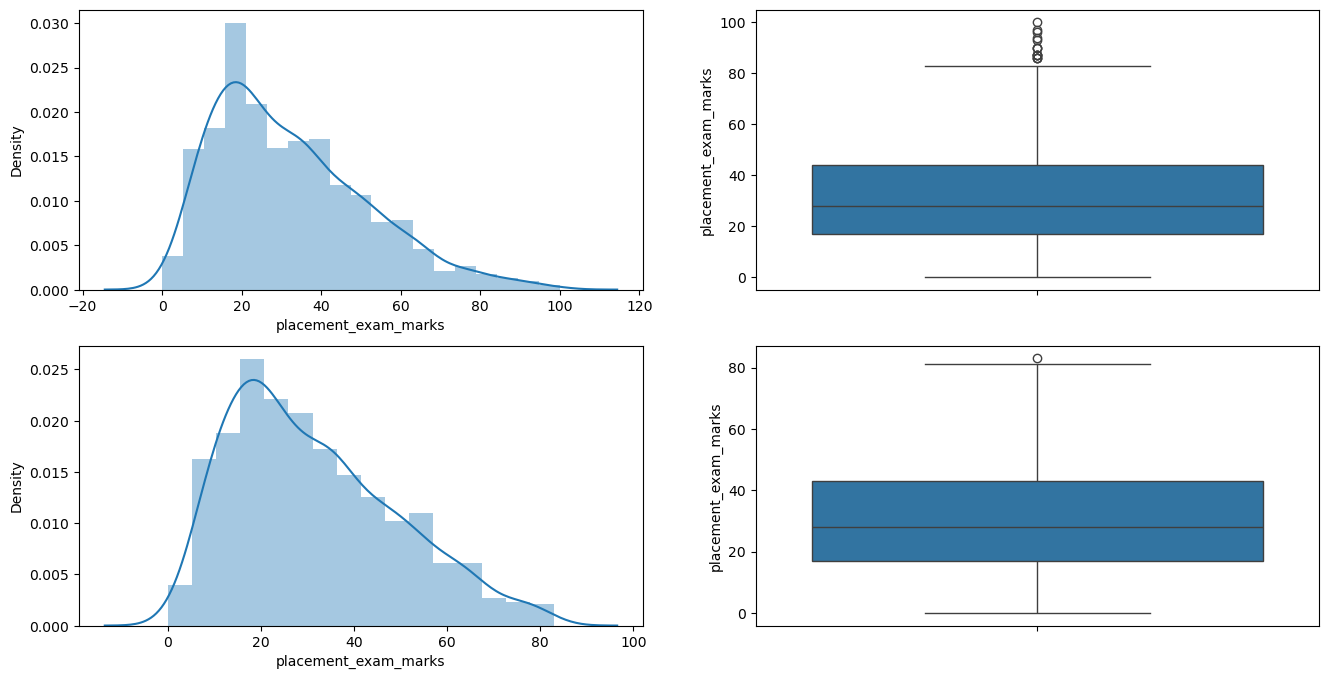

In [48]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

# capping

In [49]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [50]:
new_df_cap.shape

(1000, 3)

---

# outlier detection using percentiles

In [52]:
import numpy as np
import pandas as pd

In [53]:
df = pd.read_csv('weight-height.csv')

In [54]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [55]:
df.shape

(10000, 3)

In [56]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [57]:
import seaborn as sns

<Axes: xlabel='Height', ylabel='Count'>

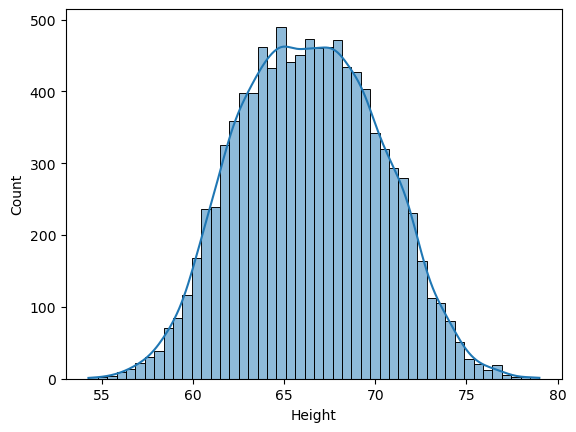

In [61]:
sns.histplot(df['Height'], kde=True)

<Axes: ylabel='Height'>

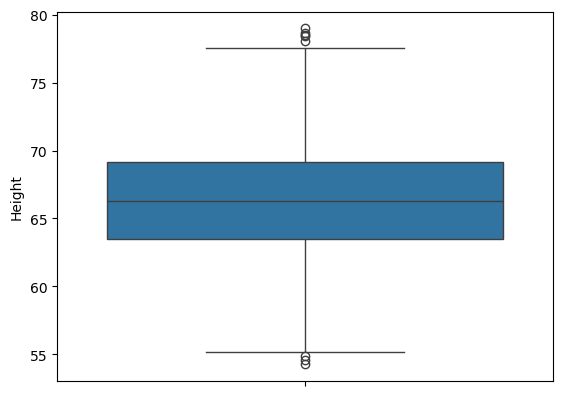

In [62]:
sns.boxplot(df['Height'])

In [73]:
upper_limit = df['Height'].quantile(0.99)
upper_limit


np.float64(74.78571507648495)

In [74]:
lower_limit = df['Height'].quantile(0.01)
lower_limit


np.float64(58.13441158671655)

In [75]:
new_df = df[(df['Height'] <= 74.78) & (df['Height'] >= 58.13)]

In [76]:
new_df['Height'].describe()

count    9799.000000
mean       66.363507
std         3.644267
min        58.134496
25%        63.577147
50%        66.317899
75%        69.119859
max        74.767447
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

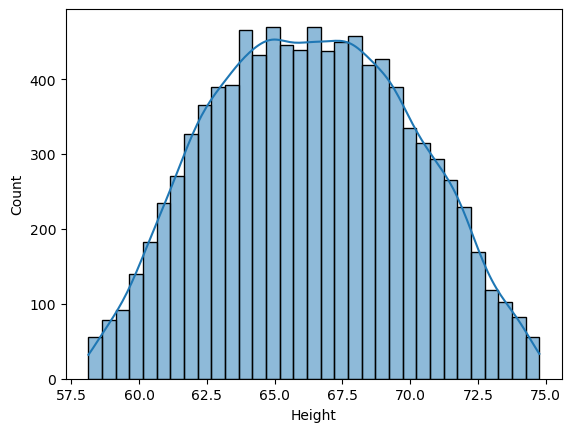

In [77]:
sns.histplot(new_df['Height'], kde=True)


<Axes: ylabel='Height'>

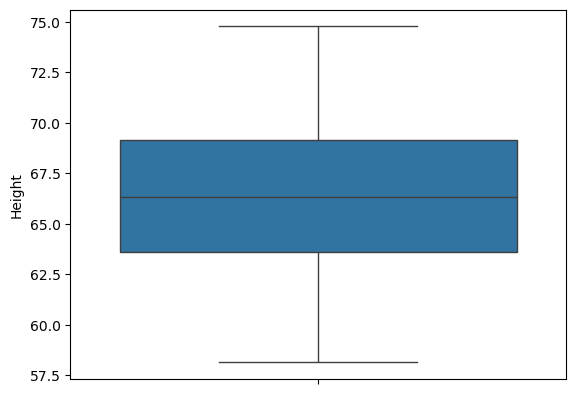

In [78]:
sns.boxplot(new_df['Height'])

# Capping --> Winsorization

In [79]:
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))

In [80]:
df.shape

(10000, 3)

In [81]:
df['Height'].describe()

count    10000.000000
mean        66.366280
std          3.795716
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785715
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

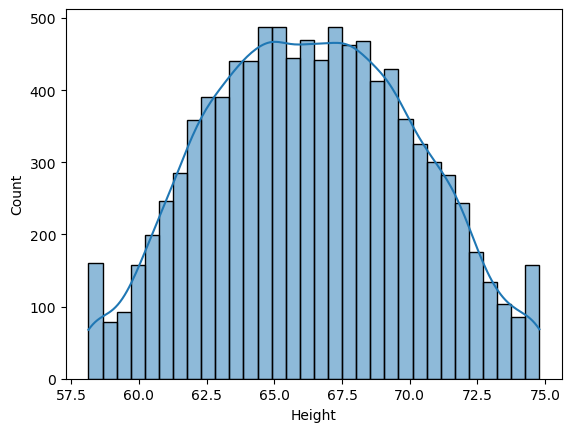

In [82]:
sns.histplot(df['Height'], kde=True)


<Axes: ylabel='Height'>

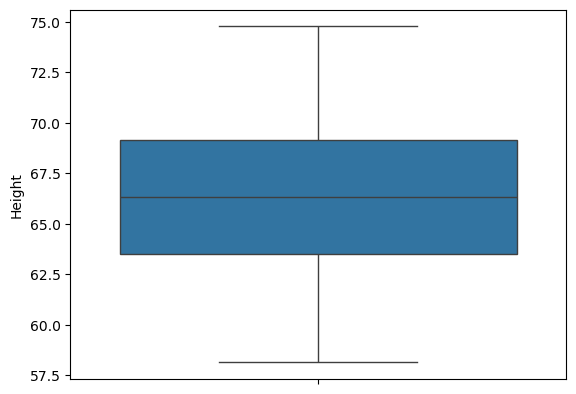

In [83]:
sns.boxplot(df['Height'])